In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt 
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [14]:
col=["p1(10)","p1(20)","p1(50)","p1(100)","p1(200)","p1(300)","p1(400)","p1(600)","p1(800)"]
dc=pd.DataFrame(columns=col)

dc

Empty DataFrame
Columns: [p1(10), p1(20), p1(50), p1(100), p1(200), p1(300), p1(400), p1(600), p1(800)]
Index: []

In [15]:
def fitting(x, y):
    RMSE={}
    for deg in np.arange(2, 21, 1):
        with warnings.catch_warnings():                 
            warnings.filterwarnings('error')         
            try:
                a = np.polyfit(x, y, deg)
            except np.RankWarning:
                break
        sume=0
        e = (np.polyval(a, x) - y )
        for i in range(len(e)):
            sume=sume+e[i]*e[i]
        Rmse=sqrt(sume/len(e))
        RMSE[deg]=Rmse
    return min(RMSE, key=RMSE.get)

In [16]:
data=pd.read_excel("2020.01.xlsx" )
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
N=len(x)
Rmse=[]
RMSE={}
for deg in range(2,20,1):
    sume=0
    for i in range(N):
        train_y = np.delete(y1,i)
        train_x = np.delete(x,i)
        test_y=y1[i]
        test_x=i
        a = np.polyfit(train_x,train_y, deg)
        e = (np.polyval(a, test_x) - test_y )
        sume=sume+e*e
    Rmse=sqrt(sume)/N
    RMSE[deg]=Rmse
RMSE

{2: 22.331291030762358,
 3: 18.028215102098546,
 4: 14.219221127420104,
 5: 10.982495501241278,
 6: 8.365104141000938,
 7: 6.425012875996372,
 8: 5.097433084822283,
 9: 4.250023263583948,
 10: 3.7419789008181006,
 11: 3.445286652335002,
 12: 3.2575667525795144,
 13: 3.1141451176060633,
 14: 2.9849731257682524,
 15: 2.859622680236776,
 16: 2.7436201503684177,
 17: 2.6444296892630863,
 18: 2.681000634838797,
 19: 2.718277719474964}

In [17]:
data=pd.read_excel("2020.01.xlsx" )
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y1 = np.array(y1)

最优阶数是： 17
p1 is :
             15             14             13            12
-1.571e-37 x  + 1.724e-33 x  - 8.556e-30 x  + 2.54e-26 x 
              11             10             9             8
 - 5.023e-23 x  + 6.981e-20 x  - 7.008e-17 x + 5.143e-14 x
              7             6             5             4           3
 - 2.762e-11 x + 1.077e-08 x - 2.998e-06 x + 0.0005806 x - 0.07558 x
         2
 + 6.38 x - 339.8 x + 1.068e+04


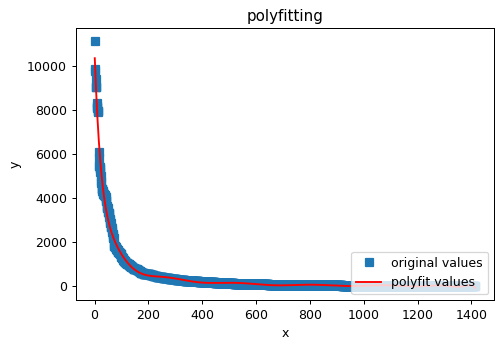

In [18]:
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y,15)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
e=yvals-y
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()

In [19]:
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202001]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

7847.956290630673 5913.4134233906625 3030.9291565643643 1449.9930099904832 476.91257916514587 343.7860790668383 155.7893488386726 86.26012869447914 61.14248301978114


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400) p1(600) p1(800)
202001   7847   5913   3030    1449     476     343     155      86      61

最优阶数是： 17
p1 is :
            17             16           15             14             13
-3.49e-42 x  + 4.189e-38 x  - 2.3e-34 x  + 7.649e-31 x  - 1.721e-27 x 
             12             11             10             9
 + 2.77e-24 x  - 3.288e-21 x  + 2.927e-18 x  - 1.965e-15 x
              8             7             6             5            4
 + 9.944e-13 x - 3.757e-10 x + 1.043e-07 x - 2.072e-05 x + 0.002841 x
           3         2
 - 0.2554 x + 14.19 x - 472.1 x + 1.026e+04


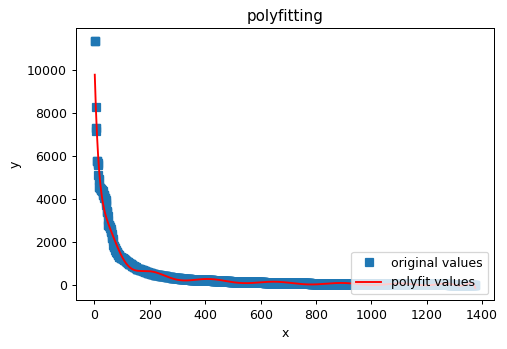

In [20]:
data=pd.read_excel("2020.02.xlsx")
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()

In [21]:
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202002]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

6724.74264459937 4839.664856950228 2837.408078992752 1281.6215935858654 620.0414841229103 220.4213247427415 256.840961880087 101.74277307213742 6.973378746331946


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400) p1(600) p1(800)
202001   7847   5913   3030    1449     476     343     155      86      61
202002   6724   4839   2837    1281     620     220     256     101       6

# 2020年3月份凉鞋销量预测

最优阶数是： 17
p1 is :
             17             16             15             14
-6.713e-41 x  + 6.849e-37 x  - 3.195e-33 x  + 9.027e-30 x 
              13             12             11            10
 - 1.725e-26 x  + 2.356e-23 x  - 2.373e-20 x  + 1.79e-17 x 
              9            8             7             6             5
 - 1.017e-14 x + 4.35e-12 x - 1.385e-09 x + 3.227e-07 x - 5.347e-05 x
             4          3         2
 + 0.006041 x - 0.4386 x + 19.01 x - 485.3 x + 9713


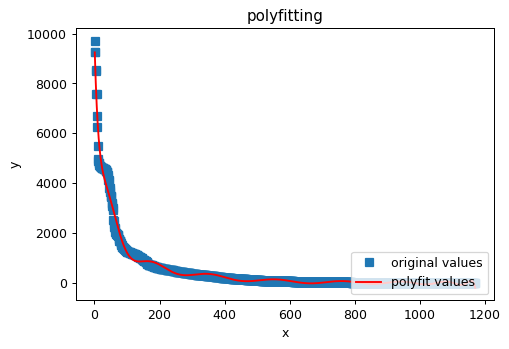

In [22]:
data=pd.read_excel("2020.03.xlsx" )
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()

In [23]:
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202003]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

6377.101888066692 4915.495741826875 3305.0899367834527 1222.341355797802 736.6495389394186 328.31025146299544 234.6647774811754 85.98248703291938 38.45240204070251


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400) p1(600) p1(800)
202001   7847   5913   3030    1449     476     343     155      86      61
202002   6724   4839   2837    1281     620     220     256     101       6
202003   6377   4915   3305    1222     736     328     234      85      38

# 2020年4月份凉鞋销量预测

In [24]:
data=pd.read_excel("2020.04.xlsx")
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()

最优阶数是： 16
p1 is :
            16             15             14             13
3.658e-41 x  - 5.225e-37 x  + 3.398e-33 x  - 1.331e-29 x 
              12             11             10             9
 + 3.506e-26 x  - 6.557e-23 x  + 8.966e-20 x  - 9.097e-17 x
              8             7             6             5             4
 + 6.876e-14 x - 3.854e-11 x + 1.581e-08 x - 4.644e-06 x + 0.0009425 x
           3         2
 - 0.1257 x + 10.26 x - 477.8 x + 1.287e+04


In [25]:
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202004]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

8998.202453284519 6547.557559456582 3585.3126828513214 2431.4487085378187 731.7999092491045 544.3688811195334 254.1451412317092 175.8831896490392 20.65430945616572


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400) p1(600) p1(800)
202001   7847   5913   3030    1449     476     343     155      86      61
202002   6724   4839   2837    1281     620     220     256     101       6
202003   6377   4915   3305    1222     736     328     234      85      38
202004   8998   6547   3585    2431     731     544     254     175      20

In [31]:
data=pd.read_excel("2020.05.xlsx" )
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(dpi=200,figsize=(8,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('2020.5-polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400))
dc.loc[202005]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

最优阶数是： 17
p1 is :
            17             16             15             14
7.315e-34 x  - 3.029e-30 x  + 5.739e-27 x  - 6.587e-24 x 
              13             12             11             10
 + 5.116e-21 x  - 2.842e-18 x  + 1.164e-15 x  - 3.576e-13 x 
              9             8             7             6           5
 + 8.281e-11 x - 1.442e-08 x + 1.871e-06 x - 0.0001772 x + 0.01188 x
           4         3         2
 - 0.5347 x + 14.78 x - 205.1 x + 398.5 x + 1.847e+04


12402.595442676491 5781.645033359733 3161.825596558505 897.2827271725218 245.6318397757459 -70.34752622875385 37.40409326164445


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400)      p1(600)  \
202001   7847   5913   3030    1449     476     343     155           86   
202002   6724   4839   2837    1281     620     220     256          101   
202003   6377   4915   3305    1222     736     328     234           85   
202004   8998   6547   3585    2431     731     544     254          175   
202005  12402   5781   3161     897     245     -70      37   2150482521   
202006   5716   3812   1259     392      96      46     -32  -2869480623   
202007   7147   5473   1987     475      68      21      -6  -2157414357   

                p1(800)  
202001               61  
202002                6  
202003               38  
202004               20  
202005   15870715083379  
202006  -14815884833395  
202007  -10608329812954

In [27]:
data=pd.read_excel("2020.06.xlsx" )
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400))
dc.loc[202006]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

最优阶数是： 17
p1 is :
             17             16             15             14
-4.913e-34 x  + 1.971e-30 x  - 3.622e-27 x  + 4.038e-24 x 
              13             12             11             10
 - 3.051e-21 x  + 1.653e-18 x  - 6.627e-16 x  + 1.999e-13 x 
              9             8             7             6            5
 - 4.572e-11 x + 7.926e-09 x - 1.034e-06 x + 0.0001002 x - 0.007039 x
          4         3         2
 + 0.347 x - 11.43 x + 234.5 x - 2769 x + 1.852e+04


5716.739061545752 3812.6375705099344 1259.4013428867765 392.0076369744893 96.8476427147798 46.81419354228274 -32.82724562723524


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400)      p1(600)  \
202001   7847   5913   3030    1449     476     343     155           86   
202002   6724   4839   2837    1281     620     220     256          101   
202003   6377   4915   3305    1222     736     328     234           85   
202004   8998   6547   3585    2431     731     544     254          175   
202005  12402   5781   3161     897     245     -70      37   2150482521   
202006   5716   3812   1259     392      96      46     -32  -2869480623   

                p1(800)  
202001               61  
202002                6  
202003               38  
202004               20  
202005   15870715083379  
202006  -14815884833395

最优阶数是： 17
p1 is :
             17             16             15             14
-3.536e-34 x  + 1.426e-30 x  - 2.639e-27 x  + 2.968e-24 x 
              13             12             11             10
 - 2.267e-21 x  + 1.244e-18 x  - 5.058e-16 x  + 1.552e-13 x 
              9             8             7             6           5
 - 3.617e-11 x + 6.406e-09 x - 8.559e-07 x + 8.502e-05 x - 0.00613 x
           4         3         2
 + 0.3094 x - 10.36 x + 212.7 x - 2480 x + 1.848e+04


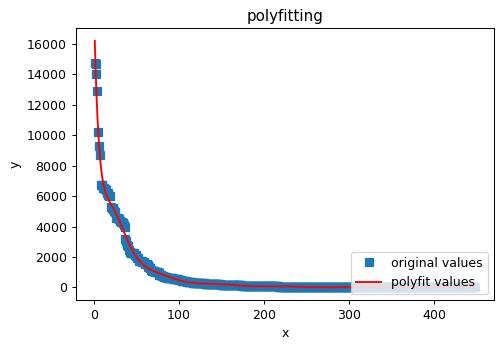

p1(10) p1(20) p1(50) p1(100) p1(200) p1(300) p1(400)      p1(600)  \
202001   7847   5913   3030    1449     476     343     155           86   
202002   6724   4839   2837    1281     620     220     256          101   
202003   6377   4915   3305    1222     736     328     234           85   
202004   8998   6547   3585    2431     731     544     254          175   
202005  12402   5781   3161     897     245     -70      37   2150482521   
202006   5716   3812   1259     392      96      46     -32  -2869480623   
202007   7147   5473   1987     475      68      21      -6  -2157414357   

                p1(800)  
202001               61  
202002                6  
202003               38  
202004               20  
202005   15870715083379  
202006  -14815884833395  
202007  -10608329812954

In [28]:
data=pd.read_excel("2020.07.xlsx")
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
#print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400))
dc.loc[202007]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

# 2020年8月份凉鞋销量预测

最优阶数是： 17
p1 is :
             17             16             15             14
-4.123e-32 x  + 1.224e-28 x  - 1.662e-25 x  + 1.366e-22 x 
              13             12             11            10
 - 7.587e-20 x  + 3.012e-17 x  - 8.811e-15 x  + 1.93e-12 x 
              9             8            7            6           5
 - 3.189e-10 x + 3.967e-08 x - 3.69e-06 x + 0.000253 x - 0.01254 x
           4         3         2
 + 0.4392 x - 10.62 x + 175.8 x - 2022 x + 1.581e+04


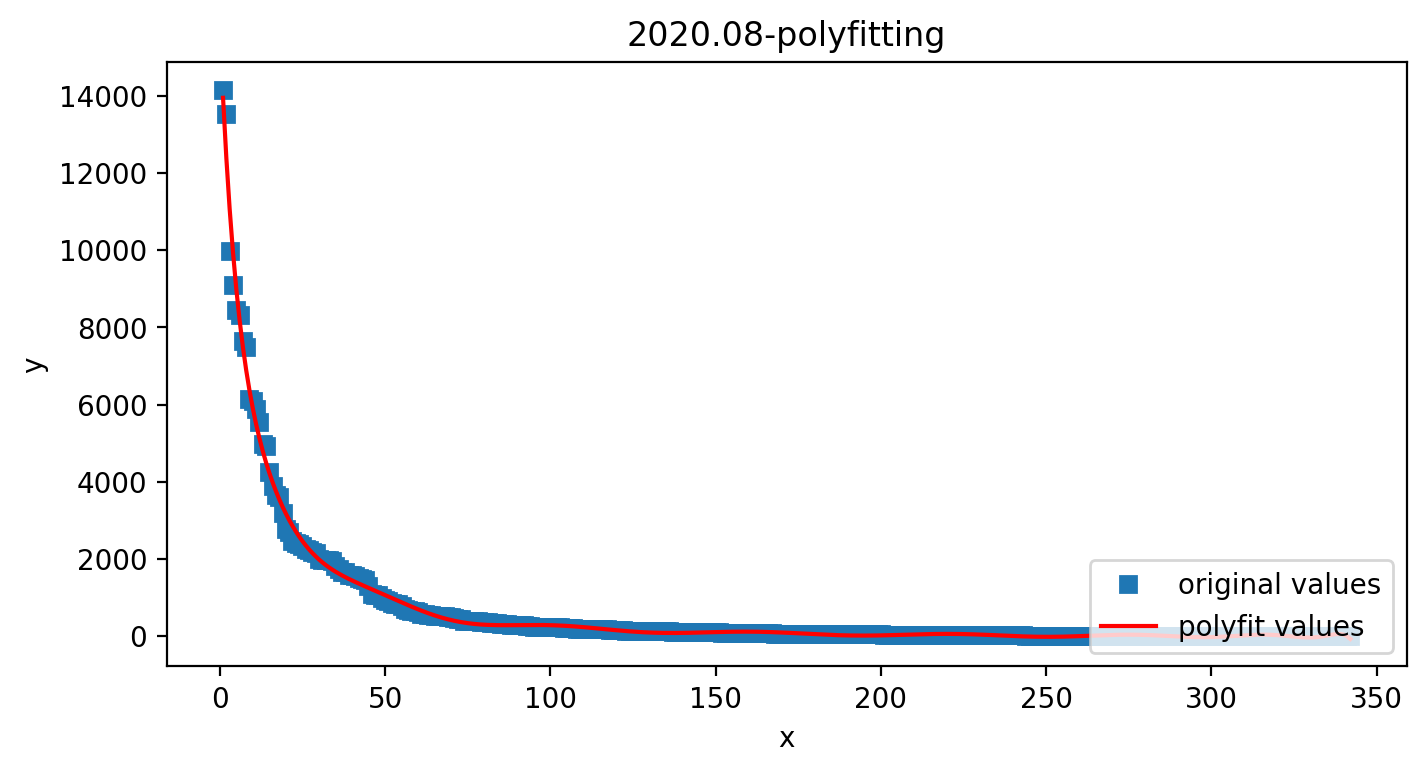

5901.879380872557 3171.8694523946215 1059.7503541179558 279.6600719555863 14.836757845399916 -28.024591120389232


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001   7847   5913   3030    1449     476     343        155   
202002   6724   4839   2837    1281     620     220        256   
202003   6377   4915   3305    1222     736     328        234   
202004   8998   6547   3585    2431     731     544        254   
202005  12402   5781   3161     897     245     -70         37   
202006   5716   3812   1259     392      96      46        -32   
202007   7147   5473   1987     475      68      21         -6   
202008   5901   3171   1059     279      14     -28  -19689204   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458

In [34]:
data=pd.read_excel("2020.08.xlsx")
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
X=[]
for i in range(800):
    X.append(i+1)
X = np.array(x)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图

plt.figure(dpi=200,figsize=(8,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('2020.08-polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300))
dc.loc[202008]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

# 2020年9月份凉鞋销量预测

In [17]:
import numpy as np
import matplotlib.pyplot as plt
 
# 模型样本
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
 
# 绘制样本曲线
plt.scatter(x, y)
plt.show()



In [19]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
 
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])

In [30]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
 
# 注意alpha后面的参数是所有theta的平方和，而对于多项式回归来说，岭回归之前得到的θ都非常大
# 所以为了限制让他们比较小，我们前面系数可以取的小一些
ridge1_reg = RidgeRegression(degree=17, alpha=0.00001)
ridge1_reg.fit(x.reshape(-1, 1), y.reshape(-1,1))
ridge1_predict = ridge1_reg.predict(x.reshape(-1, 1))
mean_squared_error(y ,ridge1_predict)
# 1.3874378026530747
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, ridge1_predict, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()

In [45]:
data=pd.read_excel("2020.09.xlsx" )
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, 10)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(dpi=200,figsize=(8,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('2020.09-polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600))
dc.loc[202009]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

最优阶数是： 17
p1 is :
           10             9             8             7             6
2.56e-20 x  - 9.863e-17 x + 1.636e-13 x - 1.527e-10 x + 8.813e-08 x
              5            4         3         2
 - 3.248e-05 x + 0.007635 x - 1.109 x + 92.75 x - 3904 x + 6.087e+04


30069.300179339367 12145.858018347528 -2189.6943873955242 2451.2315420830637 -1164.3190093087687 1061.1802473694552 -841.7306669984318 -665.2248257519386


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001   7847   5913   3030    1449     476     343        155   
202002   6724   4839   2837    1281     620     220        256   
202003   6377   4915   3305    1222     736     328        234   
202004   8998   6547   3585    2431     731     544        254   
202005  12402   5781   3161     897     245     -70         37   
202006   5716   3812   1259     392      96      46        -32   
202007   7147   5473   1987     475      68      21         -6   
202008   5901   3171   1059     279      14     -28  -19689204   
202009  30069  12145  -2189    2451   -1164    1061       -841   
202010  14925   4831    992     779     547    -243        321   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009             -665              360999  
202010              175                  20

# 2020年10月份凉鞋销量预测

最优阶数是： 17
p1 is :
             17             16             15             14
-4.102e-41 x  + 4.706e-37 x  - 2.471e-33 x  + 7.869e-30 x 
              13             12             11             10
 - 1.697e-26 x  + 2.622e-23 x  - 2.994e-20 x  + 2.569e-17 x 
              9             8             7             6             5
 - 1.668e-14 x + 8.186e-12 x - 3.015e-09 x + 8.208e-07 x - 0.0001612 x
            4         3         2
 + 0.02204 x - 1.987 x + 108.9 x - 3172 x + 3.753e+04


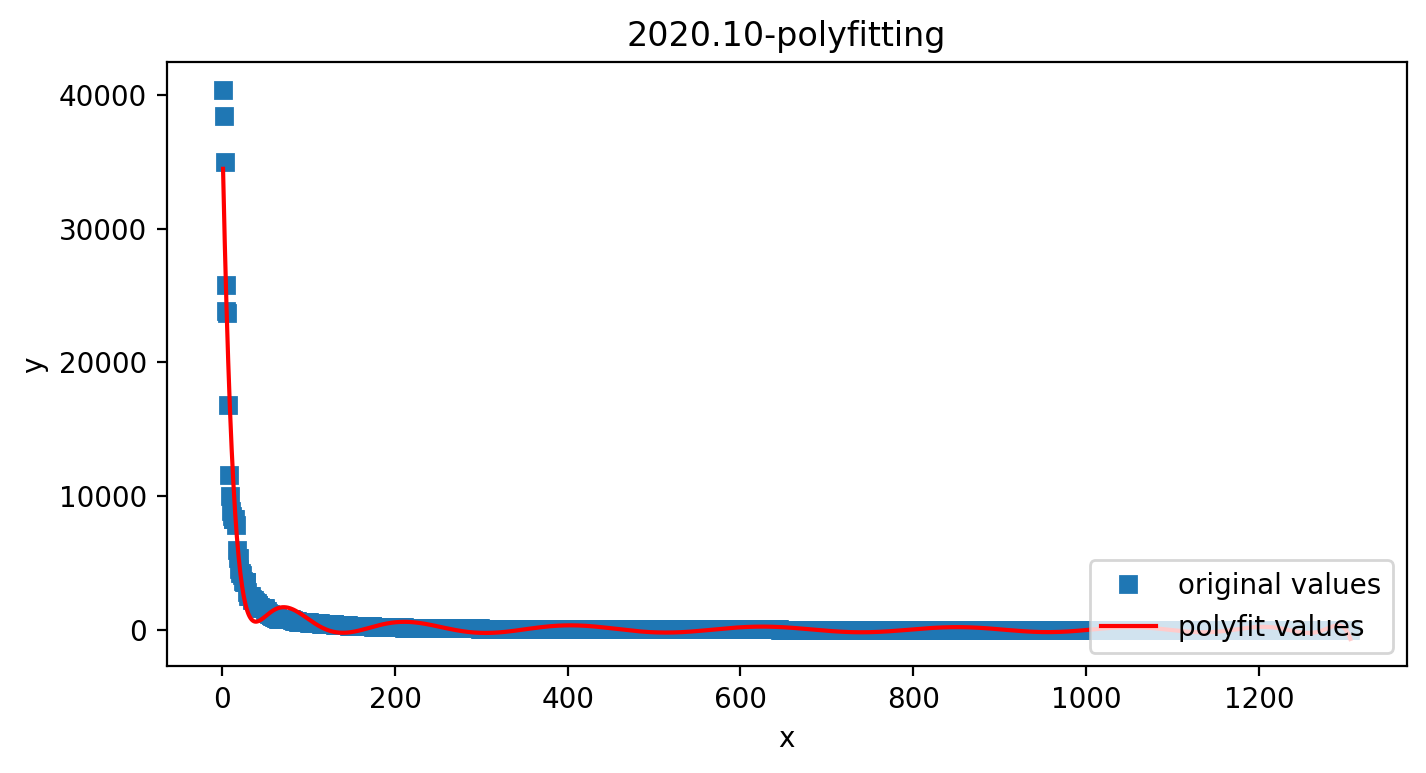

14925.245001819101 4831.815460618629 992.8438583562456 779.3165634263933 547.458876814977 -243.3481703023499 321.09807938509766 175.36153802435 20.495473058377684


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001   7847   5913   3030    1449     476     343        155   
202002   6724   4839   2837    1281     620     220        256   
202003   6377   4915   3305    1222     736     328        234   
202004   8998   6547   3585    2431     731     544        254   
202005  12402   5781   3161     897     245     -70         37   
202006   5716   3812   1259     392      96      46        -32   
202007   7147   5473   1987     475      68      21         -6   
202008   5901   3171   1059     279      14     -28  -19689204   
202009  30069  12145  -2189    2451   -1164    1061       -841   
202010  14925   4831    992     779     547    -243        321   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009             -665              360999  
202010              175                  20

In [44]:
data=pd.read_excel("2020.10.xlsx")
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(dpi=200,figsize=(8,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('2020.10-polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202010]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

# 2020年11月份凉鞋销量预测

最优阶数是： 17
p1 is :
             17             16             15            14
-1.888e-40 x  + 1.867e-36 x  - 8.471e-33 x  + 2.34e-29 x 
              13             12            11             10
 - 4.393e-26 x  + 5.937e-23 x  - 5.96e-20 x  + 4.523e-17 x 
              9             8             7             6             5
 - 2.617e-14 x + 1.155e-11 x - 3.868e-09 x + 9.702e-07 x - 0.0001786 x
           4         3         2
 + 0.0234 x - 2.082 x + 117.2 x - 3697 x + 5.1e+04


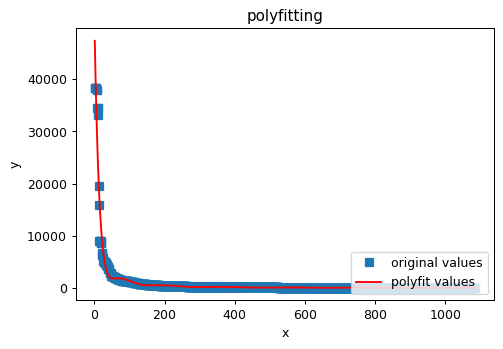

23883.799137303176 10509.93409483834 1802.4202329538748 1287.8245829352309 451.279129957009 117.40290812218882 108.72130095582543 7.011306213607895 -15.303551386692561


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001   7847   5913   3030    1449     476     343        155   
202002   6724   4839   2837    1281     620     220        256   
202003   6377   4915   3305    1222     736     328        234   
202004   8998   6547   3585    2431     731     544        254   
202005  12402   5781   3161     897     245     -70         37   
202006   5716   3812   1259     392      96      46        -32   
202007   7147   5473   1987     475      68      21         -6   
202008   5901   3171   1059     279      14     -28  -19689204   
202009  24515   5924   2018     348      73     -29         -2   
202010  14925   4831    992     779     547    -243        321   
202011  23883  10509   1802    1287     451     117        108   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009               55            -2459551  
202010              175                  20  
202011                7                 -15

In [31]:
data=pd.read_excel("2020.11.xlsx" )
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202011]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

# 2020年12月份凉鞋销量预测

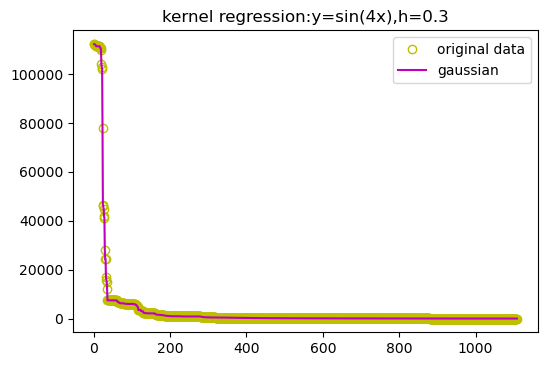

<Figure size 600x400 with 0 Axes>

111366.99998136687 102796.00292540093 7440.0 5964.0 969.0 494.9999925467492 250.00003353962856 83.99999999999999 28.000003726625394


In [100]:
import numpy as np
import matplotlib.pyplot as plt
h0 = 0.2
num = len(x)
y_rec_g = np.zeros(num)
for i in range(num):
    dist = np.abs(x-x[i])    
    gaussian_kernel = lambda d,h: np.exp(-dist**2/(2*(h**2)))/(np.sqrt(2*np.pi)*h)
for i in range(num):
    dist = np.abs(x-x[i])
    w = gaussian_kernel(dist,h0)
    y_rec_g[i] = np.sum(y*w)/np.sum(w)        
y_rec_g, y
plt.plot(x,y,'yo',markerfacecolor='none')
plt.plot(x,y_rec_g,'m')    
plt.legend(labels=['original data','gaussian'],loc='upper right')
plt.title('kernel regression:y=sin(4x),h=0.3') 
plt.figure(figsize=(6,4))
plt.rcParams["figure.dpi"] = 100
plt.show()
print(y_rec_g[10],y_rec_g[20],y_rec_g[50],y_rec_g[100],y_rec_g[200],y_rec_g[300],y_rec_g[400],y_rec_g[600],y_rec_g[800])

最优阶数是： 17
p1 is :
            17             16             15             14
4.036e-39 x  - 3.914e-35 x  + 1.736e-31 x  - 4.667e-28 x 
              13             12             11             10
 + 8.486e-25 x  - 1.104e-21 x  + 1.059e-18 x  - 7.619e-16 x 
              9             8             7             6            5
 + 4.132e-13 x - 1.686e-10 x + 5.124e-08 x - 1.137e-05 x + 0.001787 x
           4         3         2
 - 0.1887 x + 12.24 x - 400.8 x + 2517 x + 1.154e+05


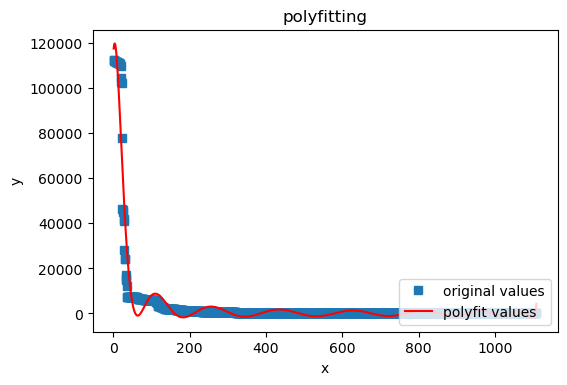

111038.88673503714 78224.93175981563 4684.888711686581 8054.353703915767 -960.2623748650512 633.8543970409519 807.5464989900647 875.3647404579824 1104.2307342386048


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001    7847   5913   3030    1449     476     343        155   
202002    6724   4839   2837    1281     620     220        256   
202003    6377   4915   3305    1222     736     328        234   
202004    8998   6547   3585    2431     731     544        254   
202005   12402   5781   3161     897     245     -70         37   
202006    5716   3812   1259     392      96      46        -32   
202007    7147   5473   1987     475      68      21         -6   
202008    5901   3171   1059     279      14     -28  -19689204   
202009   24515   5924   2018     348      73     -29         -2   
202010   14925   4831    992     779     547    -243        321   
202011   23883  10509   1802    1287     451     117        108   
202012  111038  78224   4684    8054    -960     633        807   
202101   31951  11982   8222    1650     519     967        140   
202102   33372   7627   2092     -57     317     567       -150   
202103   10744  -2330   3597     450      22    -738       -259   
202104    9306   3960   1672    1291     744     524        300   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009               55            -2459551  
202010              175                  20  
202011                7                 -15  
202012              875                1104  
202101              390                -123  
202102              269                -164  
202103              718            -4644094  
202104              369          -664930977

In [97]:
data=pd.read_excel("2020.12.xlsx")
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, 17)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202012]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

# 2021年1月份凉鞋销量预测

最优阶数是： 17
p1 is :
            17             16             15             14
-1.93e-38 x  + 1.603e-34 x  - 6.096e-31 x  + 1.406e-27 x 
              13             12             11            10
 - 2.198e-24 x  + 2.462e-21 x  - 2.039e-18 x  + 1.27e-15 x 
              9             8            7             6            5
 - 5.988e-13 x + 2.137e-10 x - 5.73e-08 x + 1.137e-05 x - 0.001631 x
           4         3         2
 + 0.1632 x - 10.81 x + 437.6 x - 9565 x + 9.317e+04


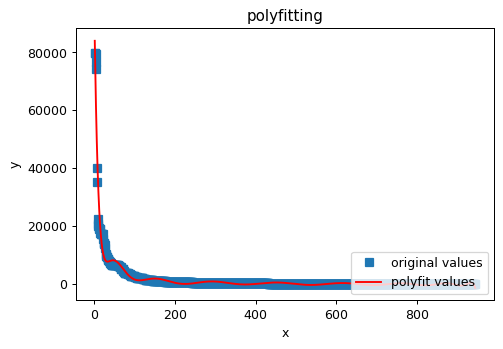

31951.076788109407 11982.772074000779 8222.60052232664 1650.8758486031147 519.6494022497936 967.1467503018939 140.7591936263052 390.0202905640035


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001    7847   5913   3030    1449     476     343        155   
202002    6724   4839   2837    1281     620     220        256   
202003    6377   4915   3305    1222     736     328        234   
202004    8998   6547   3585    2431     731     544        254   
202005   12402   5781   3161     897     245     -70         37   
202006    5716   3812   1259     392      96      46        -32   
202007    7147   5473   1987     475      68      21         -6   
202008    5901   3171   1059     279      14     -28  -19689204   
202009   24515   5924   2018     348      73     -29         -2   
202010   14925   4831    992     779     547    -243        321   
202011   23883  10509   1802    1287     451     117        108   
202012  111038  78224   4684    8054    -960     633        807   
202101   31951  11982   8222    1650     519     967        140   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009               55            -2459551  
202010              175                  20  
202011                7                 -15  
202012              875                1104  
202101              390                -123

In [33]:
data=pd.read_excel("2021.01.xlsx" )
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600))
dc.loc[202101]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

# 2021年2月份凉鞋销量预测

最优阶数是： 17
p1 is :
             25             24             23            22
-1.005e-62 x  + 5.822e-59 x  - 1.222e-55 x  + 8.23e-53 x 
              21             20             19             18
 + 6.306e-50 x  - 8.365e-47 x  - 5.994e-44 x  + 7.404e-41 x 
              17             16             15             14
 + 7.054e-38 x  - 6.447e-35 x  - 7.954e-32 x  + 6.584e-29 x 
              13             12             11             10
 + 7.832e-26 x  - 9.309e-23 x  - 3.921e-20 x  + 1.373e-16 x 
             9             8             7             6           5
 - 1.26e-13 x + 6.749e-11 x - 2.404e-08 x + 5.916e-06 x - 0.00101 x
           4         3         2
 + 0.1173 x - 8.898 x + 410.6 x - 1.014e+04 x + 1.016e+05


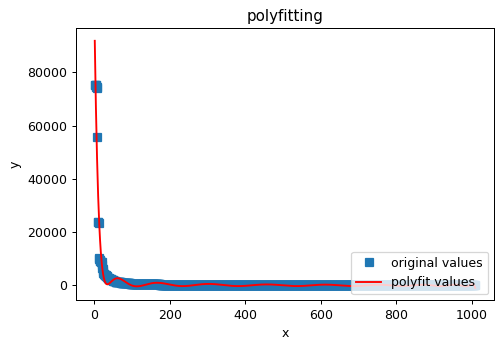

33372.6842592297 7627.4184144639 2092.426765627926 -57.50903942658624 317.294925715978 567.6412751061725 -150.62835419827024 269.2488064565987 -164.8540445328399


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001    7847   5913   3030    1449     476     343        155   
202002    6724   4839   2837    1281     620     220        256   
202003    6377   4915   3305    1222     736     328        234   
202004    8998   6547   3585    2431     731     544        254   
202005   12402   5781   3161     897     245     -70         37   
202006    5716   3812   1259     392      96      46        -32   
202007    7147   5473   1987     475      68      21         -6   
202008    5901   3171   1059     279      14     -28  -19689204   
202009   24515   5924   2018     348      73     -29         -2   
202010   14925   4831    992     779     547    -243        321   
202011   23883  10509   1802    1287     451     117        108   
202012  111038  78224   4684    8054    -960     633        807   
202101   31951  11982   8222    1650     519     967        140   
202102   33372   7627   2092     -57     317     567       -150   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009               55            -2459551  
202010              175                  20  
202011                7                 -15  
202012              875                1104  
202101              390                -123  
202102              269                -164

In [34]:
data=pd.read_excel("2021.02.xlsx"  )
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y,25)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600),p1(800))
dc.loc[202102]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

In [47]:
data=pd.read_excel("2021.03.xlsx" )
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y, n)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600))
dc.loc[202103]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

最优阶数是： 17
p1 is :
             17             16             15            14
-1.992e-36 x  + 1.306e-32 x  - 3.919e-29 x  + 7.13e-26 x 
              13             12             11             10
 - 8.784e-23 x  + 7.751e-20 x  - 5.052e-17 x  + 2.473e-14 x 
              9             8            7             6            5
 - 9.156e-12 x + 2.561e-09 x - 5.37e-07 x + 8.306e-05 x - 0.009247 x
           4         3        2
 + 0.7136 x - 36.08 x + 1096 x - 1.721e+04 x + 1.031e+05


10744.906835227419 -2330.168358805924 3597.516756832454 450.52901106599893 22.69190257237642 -738.395960741138 -259.17876436843653 718.5039405204298


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001    7847   5913   3030    1449     476     343        155   
202002    6724   4839   2837    1281     620     220        256   
202003    6377   4915   3305    1222     736     328        234   
202004    8998   6547   3585    2431     731     544        254   
202005   12402   5781   3161     897     245     -70         37   
202006    5716   3812   1259     392      96      46        -32   
202007    7147   5473   1987     475      68      21         -6   
202008    5901   3171   1059     279      14     -28  -19689204   
202009   24515   5924   2018     348      73     -29         -2   
202010   14925   4831    992     779     547    -243        321   
202011   23883  10509   1802    1287     451     117        108   
202012  111038  78224   4684    8054    -960     633        807   
202101   31951  11982   8222    1650     519     967        140   
202102   33372   7627   2092     -57     317     567       -150   
202103   10744  -2330   3597     450      22    -738       -259   
202104    9306   3960   1672    1291     744     524        300   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009               55            -2459551  
202010              175                  20  
202011                7                 -15  
202012              875                1104  
202101              390                -123  
202102              269                -164  
202103              718            -4644094  
202104              369          -664930977

最优阶数是： 17
p1 is :
             23             22             21             20
-8.321e-53 x  + 3.926e-49 x  - 7.353e-46 x  + 6.168e-43 x 
              19            18             17             16
 - 7.758e-41 x  - 2.38e-37 x  + 9.738e-35 x  + 9.188e-32 x 
              15             14             13             12
 - 6.496e-29 x  - 3.053e-26 x  + 4.181e-23 x  - 1.544e-21 x 
              11             10             9             8
 - 2.095e-17 x  + 1.752e-14 x  - 7.939e-12 x + 2.371e-09 x
              7             6            5          4         3
 - 4.934e-07 x + 7.243e-05 x - 0.007429 x + 0.5175 x - 23.29 x
          2
 + 625.9 x - 8866 x + 5.416e+04


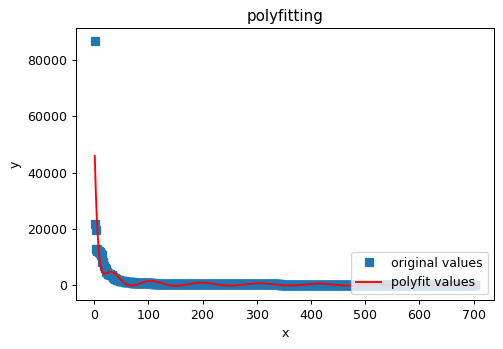

9306.9767663831 3960.021325755464 1672.1762148991984 1291.2300083529117 744.9568884239197 524.0959491965696 300.42253511085437 369.7714125209386


p1(10) p1(20) p1(50) p1(100) p1(200) p1(300)    p1(400)  \
202001    7847   5913   3030    1449     476     343        155   
202002    6724   4839   2837    1281     620     220        256   
202003    6377   4915   3305    1222     736     328        234   
202004    8998   6547   3585    2431     731     544        254   
202005   12402   5781   3161     897     245     -70         37   
202006    5716   3812   1259     392      96      46        -32   
202007    7147   5473   1987     475      68      21         -6   
202008    5901   3171   1059     279      14     -28  -19689204   
202009   24515   5924   2018     348      73     -29         -2   
202010   14925   4831    992     779     547    -243        321   
202011   23883  10509   1802    1287     451     117        108   
202012  111038  78224   4684    8054    -960     633        807   
202101   31951  11982   8222    1650     519     967        140   
202102   33372   7627   2092     -57     317     567       -150   
202103   10744  -2330   3597     450      22    -738       -259   
202104    9306   3960   1672    1291     744     524        300   

                p1(600)             p1(800)  
202001               86                  61  
202002              101                   6  
202003               85                  38  
202004              175                  20  
202005       2150482521      15870715083379  
202006      -2869480623     -14815884833395  
202007      -2157414357     -10608329812954  
202008  -10011331292805  -10309130670982458  
202009               55            -2459551  
202010              175                  20  
202011                7                 -15  
202012              875                1104  
202101              390                -123  
202102              269                -164  
202103              718            -4644094  
202104              369          -664930977

In [48]:
data=pd.read_excel("2021.04.xlsx" )
data=data.fillna(0)
y1=list(data["月销量"])
x=[]
for i in range(len(y1)):
    x.append(i+1)
x = np.array(x)
y = np.array(y1)
#print('y is :\n',y)
#用3次多项式拟合
n=fitting(x,y)
print('最优阶数是：',n)
f1 = np.polyfit(x, y,23)
#print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
#print('yvals is :\n',yvals)
#绘图
plt.figure(figsize=(6,4))
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.rcParams["figure.dpi"] = 90
plt.show()
print(p1(10),p1(20),p1(50),p1(100),p1(200),p1(300),p1(400),p1(600))
dc.loc[202104]=[int(p1(10)),int(p1(20)),int(p1(50)),int(p1(100)),int(p1(200)),int(p1(300)),int(p1(400)),int(p1(600)),int(p1(800))]
dc

In [51]:
dc.to_excel("穆勒鞋拟合预测数据.xlsx")